In [65]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import requests
import io
from sklearn import mixture
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.svm import SVC
from sklearn.metrics import log_loss, auc, roc_auc_score, roc_curve, average_precision_score, homogeneity_score, silhouette_score
from sklearn.metrics.cluster import adjusted_rand_score, normalized_mutual_info_score, adjusted_mutual_info_score, fowlkes_mallows_score, completeness_score
from sklearn import preprocessing
from sklearn.random_projection import GaussianRandomProjection
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.metrics import plot_roc_curve
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import validation_curve
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA, FastICA
import itertools

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel


from scipy import linalg
import missingno
import sklearn
from xgboost import XGBClassifier
from xgboost import plot_tree

from imblearn.over_sampling import SMOTE
import scikitplot as skplt

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl


# File located in google drive
url = "https://drive.google.com/uc?export=download&id=1p5qOHBkiRing9gEd341mz9LVvEGtlbpL"

file = requests.get(url).content
df = pd.read_csv(io.StringIO(file.decode('utf-8')))



In [3]:
df.head()

,enrollee_id,gender,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,city,city_development_index,relevent_experience,training_hours,target
0,8949,1,0,2,0,21,4,1,1,5,0.920,1,36,1
1,29725,1,0,2,0,15,5,0,5,77,0.776,0,47,0
2,11561,1,1,2,0,5,2,0,0,64,0.624,0,83,0
3,33241,1,1,2,1,0,2,0,0,14,0.789,0,52,1
4,666,1,0,3,0,21,5,1,4,50,0.767,1,8,0


In [4]:
# Prepare variables by dropping id & target for X, and just add the target to Y 
#X = df.drop(['city', 'city_development_index'], axis = 1)
X = df.drop(['enrollee_id','target'], axis = 1)
Y = df['target']

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


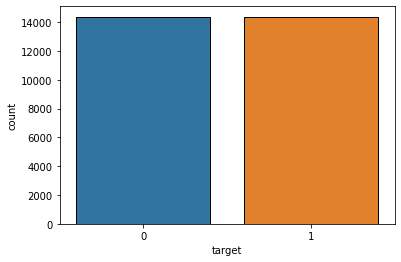

In [5]:
smote = SMOTE(random_state = 402)
X, Y = smote.fit_resample(X,Y)

sns.countplot(Y, edgecolor = 'black')

In [6]:
# Separate the data in Train & Test
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state = 42, shuffle = True, test_size = 0.2)
X_train.head()

,gender,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,city,city_development_index,relevent_experience,training_hours
3274,1,0,3,0,8,4,4,1,64,0.624,1,5
6325,1,0,2,0,16,5,0,1,6,0.924,1,133
2425,2,1,3,0,11,3,1,5,95,0.855,0,78
15404,1,0,2,0,10,3,0,4,83,0.762,1,83
26265,1,0,2,0,18,4,0,1,5,0.920,1,146


In [7]:
columns = X.columns
X_train = preprocessing.normalize(X_train)
X_train = pd.DataFrame(X_train, columns = columns)
X_train.head()

,gender,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,city,city_development_index,relevent_experience,training_hours
0,0.015377,0.00000,0.046130,0.0,0.123013,0.061507,0.061507,0.015377,0.984104,0.009595,0.015377,0.076883
1,0.007451,0.00000,0.014901,0.0,0.119211,0.037253,0.000000,0.007451,0.044704,0.006884,0.007451,0.990942
2,0.016180,0.00809,0.024270,0.0,0.088989,0.024270,0.008090,0.040449,0.768539,0.006917,0.000000,0.631011
3,0.008479,0.00000,0.016958,0.0,0.084790,0.025437,0.000000,0.033916,0.703754,0.006461,0.008479,0.703754
4,0.006790,0.00000,0.013580,0.0,0.122223,0.027161,0.000000,0.006790,0.033951,0.006247,0.006790,0.991367


columns = X.columns
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns = columns)

X_test = scaler.fit_transform(X_test)
X_test = pd.DataFrame(X_test, columns = columns)
X_test.head()

In [8]:
columns = X.columns
X = preprocessing.normalize(X)
X = pd.DataFrame(X, columns = columns)
X.head()

,gender,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,city,city_development_index,relevent_experience,training_hours
0,0.023657,0.000000,0.047314,0.000000,0.496793,0.094627,0.023657,0.023657,0.118284,0.021764,0.023657,0.851646
1,0.010899,0.000000,0.021798,0.000000,0.163482,0.054494,0.000000,0.054494,0.839210,0.008457,0.000000,0.512245
2,0.009526,0.009526,0.019052,0.000000,0.047629,0.019052,0.000000,0.000000,0.609651,0.005944,0.000000,0.790642
3,0.018532,0.018532,0.037065,0.018532,0.000000,0.037065,0.000000,0.000000,0.259454,0.014622,0.000000,0.963687
4,0.018082,0.000000,0.054245,0.000000,0.379716,0.090409,0.018082,0.072327,0.904085,0.013869,0.018082,0.144654


columns = X.columns
X_train = preprocessing.normalize(X_train)
X_train = pd.DataFrame(X_train, columns = columns)

X_test = preprocessing.normalize(X_test)
X_test = pd.DataFrame(X_test, columns = columns)
X_test.head()

In [9]:
Y_train.value_counts(normalize=True)

1    0.500022
0    0.499978
Name: target, dtype: float64

In [10]:
Y_test.value_counts(normalize=True)

0    0.500087
1    0.499913
Name: target, dtype: float64

## Functions

In [11]:
def kmeans_run(X,Y):
    
    inertias = []
    silhouette = []
    homogeneity = []
    for i in range(2, 11):
        km = KMeans(
            n_clusters=i, init='random',
            n_init=10, max_iter=1000,
            ##tol=1e-04, 
            random_state=50
        ).fit(X)
        inertias.append(km.inertia_)
        silhouette.append(silhouette_score(X, km.labels_))
        homogeneity.append(homogeneity_score(Y,km.labels_))
        
    # plot
    fig = plt.figure(figsize=(20,4))
    ax = fig.add_subplot(1,3,1)
    plt.plot(inertias, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertias')
    
    bx = fig.add_subplot(1,3,2)
    plt.plot(silhouette, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette')
    
    cx = fig.add_subplot(1,3,3)
    plt.plot(homogeneity, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('homogeneity')
    plt.show()
    

def em_run(X,Y):
    silhouette = []
    aic = []
    bic = []
    homogeneity = []
    lowest_bic = np.infty
    lowest_aic = np.infty

    n_components_range = np.arange(2,16,3)
    cv_types = ['spherical', 'tied', 'diag', 'full']
    for cv_type in cv_types:
        for i in n_components_range:
            em = GaussianMixture(
                n_components=i,
                covariance_type=cv_type,
                n_init=10,
                max_iter=1000,
                random_state=50
            ).fit(X)
            prediction = em.predict(X)
            aic.append(em.aic(X))
            bic.append(em.bic(X))
            silhouette.append(silhouette_score(X, prediction))
            homogeneity.append(homogeneity_score(Y,prediction))            
            if bic[-1] < lowest_bic:
                lowest_bic = bic[-1]
                best_gem = em # Plot the BIC scores
        
    # Plot the BIC scores
    clf = best_gem
    bars = []
    color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue','darkorange'])
    plt.figure(figsize=(20, 10))
    spl = plt.subplot(2, 1, 1)
    for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
        xpos = np.array(n_components_range) + .2 * (i - 2)
        bars.append(plt.bar(xpos, bic[i * len(n_components_range):
                                      (i + 1) * len(n_components_range)],
                            width=.2, color=color))
    plt.xticks(n_components_range)
    plt.ylim([min(bic) * 1.01 - .01 * max(bic), max(bic)])
    plt.title('BIC score per model')
    xpos = np.mod(np.argmin(bic), len(n_components_range)) + .65 +\
        .2 * np.floor(np.argmin(bic) / len(n_components_range))
    plt.text(xpos, min(bic) * 0.97 + .03 * max(bic), '*', fontsize=14)
    spl.set_xlabel('Number of components')
    spl.legend([b[0] for b in bars], cv_types)

In [12]:
#Model Evaluation
def kmeans_eval(X,Y,n_clusters):
    
    kmeans = KMeans(n_clusters=n_clusters, 
                init = 'random',
                n_init=10,
                max_iter=1000,                
                random_state=50).fit(X)
    prediction = kmeans.fit_predict(X)
    adj_rand = adjusted_rand_score(Y,kmeans.labels_)
    norm = normalized_mutual_info_score(Y,kmeans.labels_)
    adj_mutual = adjusted_mutual_info_score(Y,kmeans.labels_)
    fowlkes = fowlkes_mallows_score(Y,kmeans.labels_)
    sil = silhouette_score(X, kmeans.labels_, metric = 'euclidean')
    homog = homogeneity_score(Y, kmeans.labels_)
    complete = completeness_score(Y, kmeans.labels_)
    
    print("Model Evaluation: K-Means")
    print("| Clusters = ", n_clusters)
    print("| Iterations to converge = ", kmeans.n_iter_)
    print("| Adjusted rand score = {:.2f}".format(adj_rand), " | A perfect labeling would be scored 1" )
    print("| Normalized Mutual Information Score = {:.2f}".format(norm))
    print("| Adjusted Mutual Information Score = {:.2f}".format(adj_mutual))
    print("| Fowlkes Mallows Score = {:.2f}".format(fowlkes))
    print("| Silhouette Coefficient = {:.2f}".format(sil))
    print('| Inertia = ' , kmeans.inertia_)
    print("| Homogeneity Score = {:.2f}".format(homog))
    print('| completeness score = {:.2f}'.format(complete))
    print(" --- ")
    
    
    plt.scatter(X.iloc[prediction==0, 0], X.iloc[prediction==0, 1], s=100, c='red', label ='Cluster 1')
    plt.scatter(X.iloc[prediction==1, 0], X.iloc[prediction==1, 1], s=100, c='blue', label ='Cluster 2')
    plt.scatter(X.iloc[prediction==2, 0], X.iloc[prediction==2, 1], s=100, c='black', label ='Cluster 3')
    plt.scatter(X.iloc[prediction==3, 0], X.iloc[prediction==3, 1], s=100, c='purple', label ='Cluster 4')

    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')
    plt.title('Kmeans')
    plt.xlabel('component 1')
    plt.ylabel('component 2')
    plt.show()
    
    
    
def em_eval(X,Y,n_components, covariance_type):
    gmm = GaussianMixture(n_components = n_components, 
                      covariance_type = covariance_type,
                      random_state=50).fit(X)
    labels = gmm.predict(X)
    adj_rand = adjusted_rand_score(Y,labels)
    norm = normalized_mutual_info_score(Y,labels)
    adj_mutual = adjusted_mutual_info_score(Y,labels)
    fowlkes = fowlkes_mallows_score(Y,labels)
    sil = silhouette_score(X, labels, metric = 'euclidean')
    homog = homogeneity_score(Y, labels)
    complete = completeness_score(Y, labels)
    
    print("Model Evaluation: EM")
    print("| Components = ", n_components)
    print("| Covariance = ", covariance_type)
    print("| Adjusted rand score = {:.2f}".format(adj_rand), " | A perfect labeling would be scored 1" )
    print("| Normalized Mutual Information Score = {:.2f}".format(norm))
    print("| Adjusted Mutual Information Score = {:.2f}".format(adj_mutual))
    print("| Fowlkes Mallows Score = {:.2f}".format(fowlkes))
    print("| Silhouette Coefficient = {:.2f}".format(sil))    
    print('| Log-likelihood value = {:.2f}'.format(gmm.lower_bound_))
    print("| Homogeneity Score = {:.2f}".format(homog))
    print('| completeness score = {:.2f}'.format(complete))
    print(" --- ")
    
    #https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html
    ax=None
    ax = ax or plt.gca()
    label = True
    if label:
        ax.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X.iloc[:, 0], X.iloc[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    plt.title('EM')
    plt.xlabel('gender')
    plt.ylabel('education level')
    plt.show()
    
   

In [13]:
def PCA_run(X,Y): 
    #https://www.mikulskibartosz.name/pca-how-to-choose-the-number-of-components/
    pca = PCA().fit(X)
    plt.rcParams["figure.figsize"] = (12,6)
    fig, ax = plt.subplots()
    xi = np.arange(1, 13, step=1)
    y = np.cumsum(pca.explained_variance_ratio_)

    plt.ylim(0.0,1.1)
    plt.plot(xi, y, marker='o', linestyle='--', color='b')

    plt.xlabel('Number of Components')
    plt.xticks(np.arange(0, 11, step=1)) #change from 0-based array index to 1-based human-readable label
    plt.ylabel('Cumulative variance (%)')
    plt.title('The number of components needed to explain variance')

    plt.axhline(y=0.95, color='r', linestyle='-')
    plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

    ax.grid(axis='x')
    plt.show()
    
    print("Variance explained by the First principal component = ", np.cumsum(pca.explained_variance_ratio_ * 100)[0])
    print("Variance explained by the First 2 principal components = ", np.cumsum(pca.explained_variance_ratio_ * 100)[1])
    print("Variance explained by the First 3 principal components = ", np.cumsum(pca.explained_variance_ratio_ * 100)[2])
    print("Variance explained by the First 4 principal components = ", np.cumsum(pca.explained_variance_ratio_ * 100)[3])
    print("Variance explained by the First 5 principal components = ", np.cumsum(pca.explained_variance_ratio_ * 100)[4])
    
    pca_95 = PCA(n_components=0.95, random_state =50)
    pca_95.fit(X)
    X_pca_95 = pca_95.transform(X)
    
    print("PCA 95% shape", X_pca_95.shape)
    
    
def ICA_run(X,Y):
    kurtosis = []
    for i in range(1, 13):
        ica = FastICA(
            n_components=i,
            max_iter=10000,
            random_state=50
        ).fit_transform(X)
        ica = pd.DataFrame(ica)
        kurtosis.append(ica.kurt(axis=0).abs().mean())
    plt.plot(range(1,13), kurtosis, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Kurtosis')
    plt.plot()
    
    


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

## Clustering 1 - K-Means

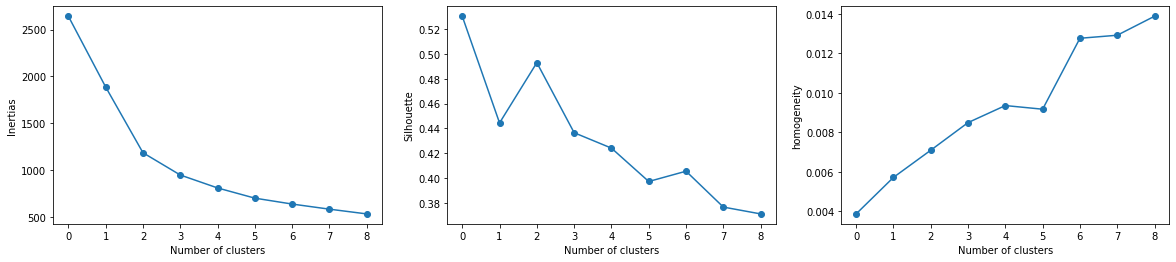

In [15]:
kmeans_run(X,Y)

Model Evaluation: K-Means
| Clusters =  2
| Iterations to converge =  9
| Adjusted rand score = 0.01  | A perfect labeling would be scored 1
| Normalized Mutual Information Score = 0.00
| Adjusted Mutual Information Score = 0.00
| Fowlkes Mallows Score = 0.50
| Silhouette Coefficient = 0.53
| Inertia =  2642.2374039111746
| Homogeneity Score = 0.00
| completeness score = 0.00
 --- 


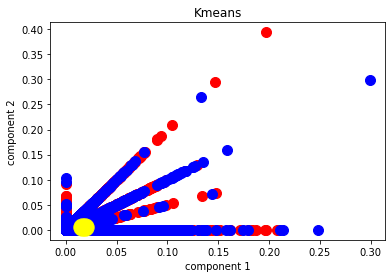

Model Evaluation: K-Means
| Clusters =  4
| Iterations to converge =  17
| Adjusted rand score = 0.00  | A perfect labeling would be scored 1
| Normalized Mutual Information Score = 0.00
| Adjusted Mutual Information Score = 0.00
| Fowlkes Mallows Score = 0.39
| Silhouette Coefficient = 0.49
| Inertia =  1185.3208748273998
| Homogeneity Score = 0.01
| completeness score = 0.00
 --- 


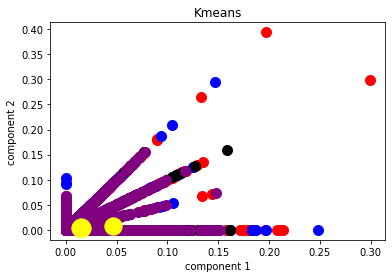

In [16]:
kmeans_eval(X,Y,n_clusters = 2)
kmeans_eval(X,Y,n_clusters = 4)

In [17]:
kmeans = KMeans(n_clusters=2, 
                init = 'random',
                n_init=10,
                max_iter=1000,                
                random_state=50).fit(X)

y_kmeans = kmeans.fit_predict(X)

## Clustering 1 - EM (Expectation Maximization)

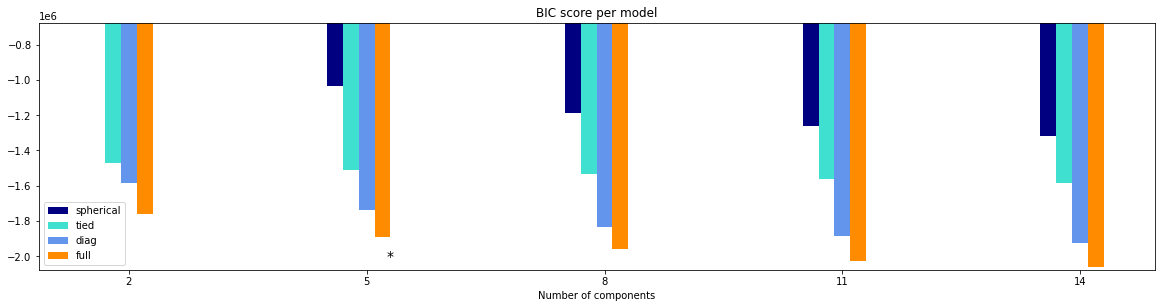

In [18]:
em_run(X,Y)

Model Evaluation: EM
| Components =  5
| Covariance =  full
| Adjusted rand score = 0.01  | A perfect labeling would be scored 1
| Normalized Mutual Information Score = 0.01
| Adjusted Mutual Information Score = 0.01
| Fowlkes Mallows Score = 0.33
| Silhouette Coefficient = 0.26
| Log-likelihood value = 32.57
| Homogeneity Score = 0.01
| completeness score = 0.01
 --- 


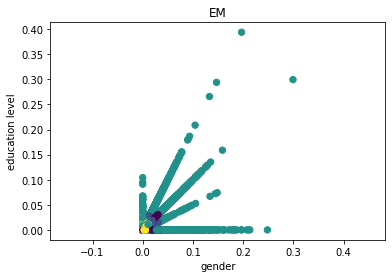

Model Evaluation: EM
| Components =  5
| Covariance =  diag
| Adjusted rand score = 0.01  | A perfect labeling would be scored 1
| Normalized Mutual Information Score = 0.01
| Adjusted Mutual Information Score = 0.01
| Fowlkes Mallows Score = 0.35
| Silhouette Coefficient = 0.06
| Log-likelihood value = 30.22
| Homogeneity Score = 0.02
| completeness score = 0.01
 --- 


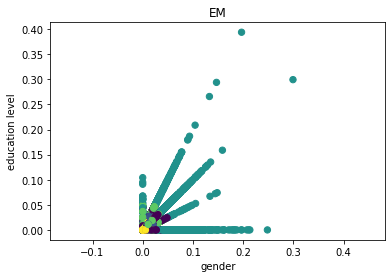

In [19]:
em_eval(X,Y,n_components=5,covariance_type='full')
em_eval(X,Y,n_components=5,covariance_type='diag')

## PCA

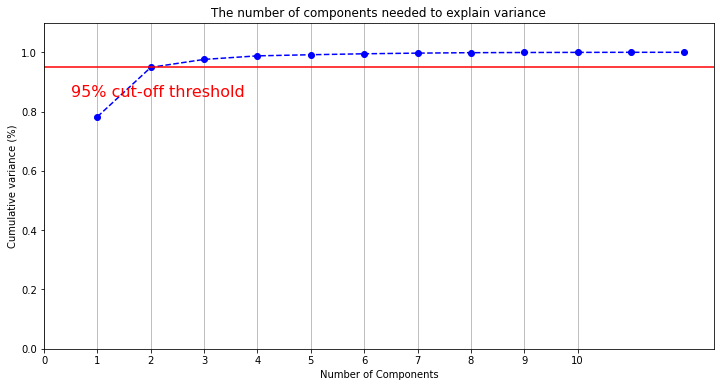

Variance explained by the First principal component =  78.27850637731338
Variance explained by the First 2 principal components =  94.91464706864474
Variance explained by the First 3 principal components =  97.5958480910372
Variance explained by the First 4 principal components =  98.79917249120463
Variance explained by the First 5 principal components =  99.17521388236365
PCA 95% shape (28762, 3)


In [20]:
PCA_run(X,Y)

Text(0.5, 1.0, '')

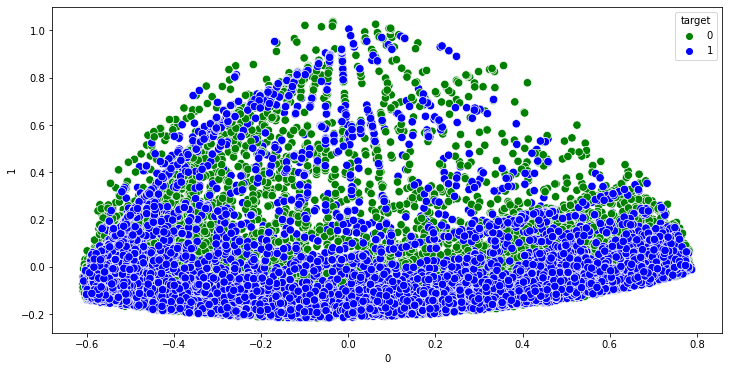

In [21]:
X_PCA = PCA(n_components = 3, random_state = 50).fit_transform(X)
X_PCA = pd.DataFrame(X_PCA)

plt.figure()
sns.scatterplot(x=X_PCA.iloc[:,0], y=X_PCA.iloc[:,1], s = 70,
              hue = Y, palette = ['green','blue'])
plt.title("")

Text(0.5, 0, 'Third principal component')

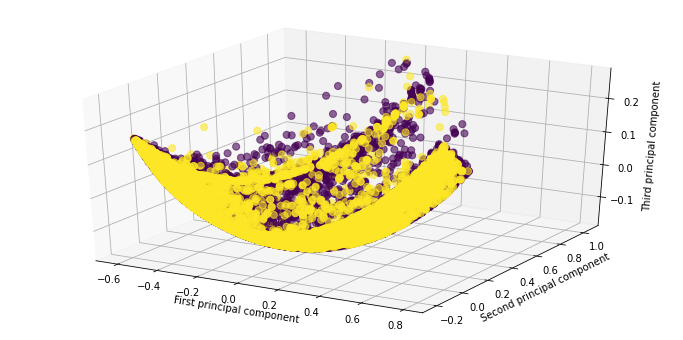

In [22]:
from mpl_toolkits import mplot3d

fig = plt.figure()
ax = plt.axes(projection='3d')

sctt = ax.scatter3D(X_PCA.iloc[:,0], 
                    X_PCA.iloc[:,1],
                    X_PCA.iloc[:,2],
                   c = Y, s=50, alpha = 0.6)

ax.set_xlabel('First principal component')
ax.set_ylabel('Second principal component')
ax.set_zlabel('Third principal component')


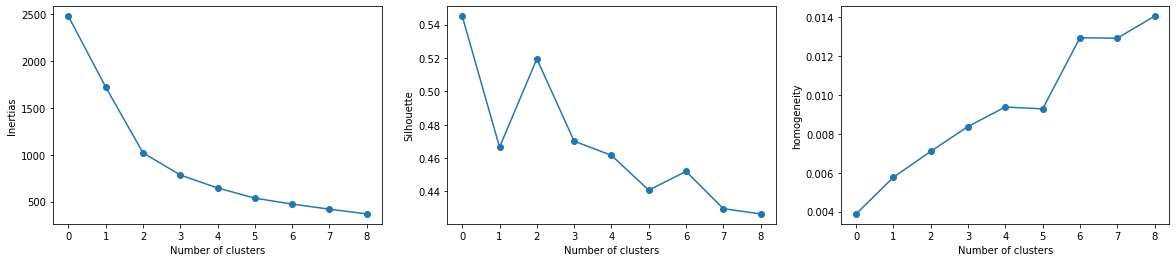

In [23]:
kmeans_run(X_PCA,Y)

Model Evaluation: K-Means
| Clusters =  2
| Iterations to converge =  8
| Adjusted rand score = 0.01  | A perfect labeling would be scored 1
| Normalized Mutual Information Score = 0.00
| Adjusted Mutual Information Score = 0.00
| Fowlkes Mallows Score = 0.50
| Silhouette Coefficient = 0.55
| Inertia =  2478.0716145025594
| Homogeneity Score = 0.00
| completeness score = 0.00
 --- 


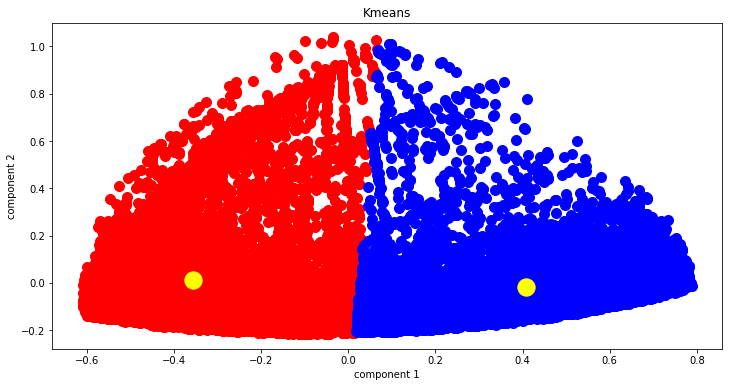

In [24]:
kmeans_eval(X_PCA,Y,n_clusters = 2)

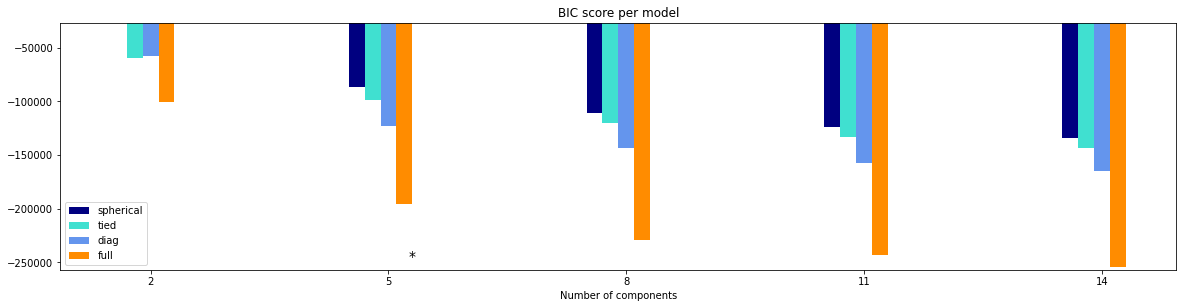

In [25]:
em_run(X_PCA,Y)

Model Evaluation: EM
| Components =  5
| Covariance =  full
| Adjusted rand score = 0.01  | A perfect labeling would be scored 1
| Normalized Mutual Information Score = 0.01
| Adjusted Mutual Information Score = 0.01
| Fowlkes Mallows Score = 0.33
| Silhouette Coefficient = 0.42
| Log-likelihood value = 3.41
| Homogeneity Score = 0.01
| completeness score = 0.01
 --- 


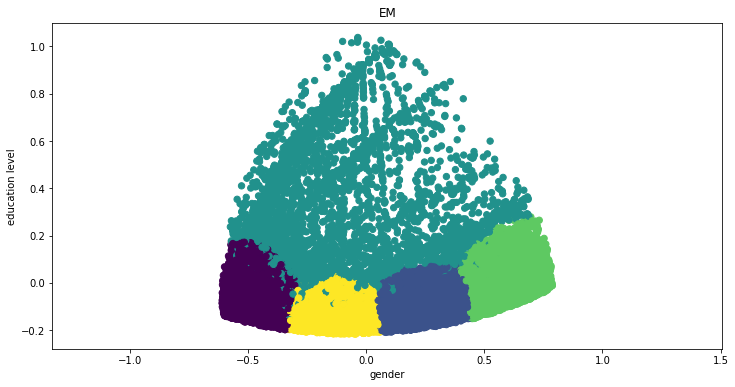

In [26]:
em_eval(X_PCA,Y,n_components = 5, covariance_type = 'full')


## ICA

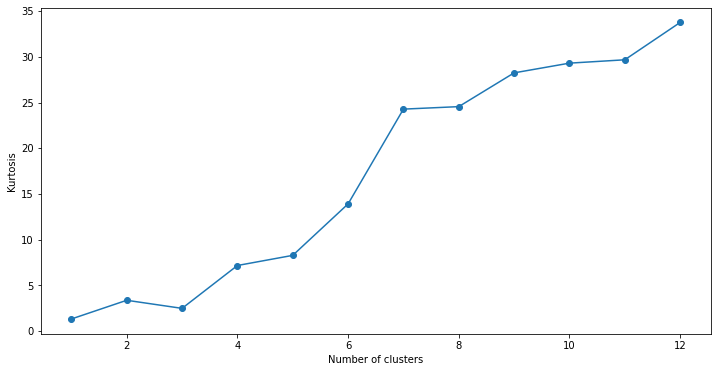

In [27]:
ICA_run(X,Y)

In [28]:
X_ICA = FastICA(n_components = 3, random_state =50).fit_transform(X)
X_ICA = pd.DataFrame(X_ICA)

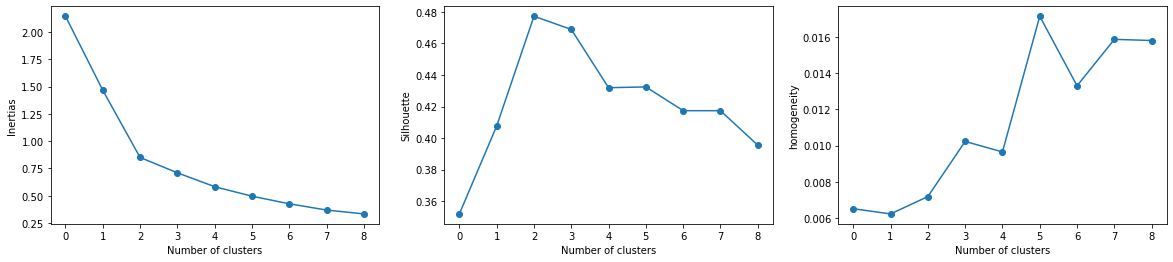

In [29]:
kmeans_run(X_ICA,Y)

Model Evaluation: K-Means
| Clusters =  2
| Iterations to converge =  10
| Adjusted rand score = 0.01  | A perfect labeling would be scored 1
| Normalized Mutual Information Score = 0.01
| Adjusted Mutual Information Score = 0.01
| Fowlkes Mallows Score = 0.51
| Silhouette Coefficient = 0.35
| Inertia =  2.145193112308142
| Homogeneity Score = 0.01
| completeness score = 0.01
 --- 


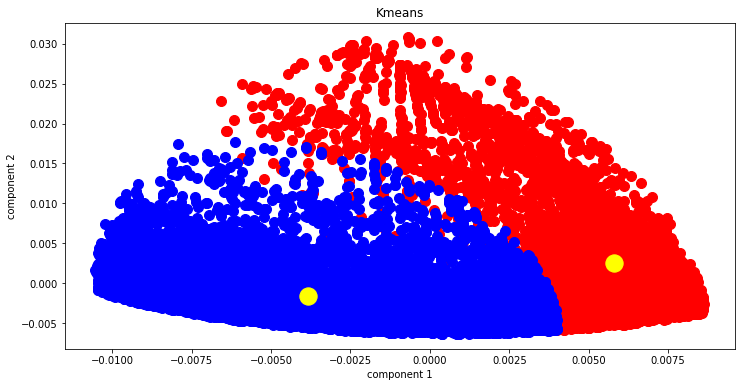

In [30]:
kmeans_eval(X_ICA,Y,2)

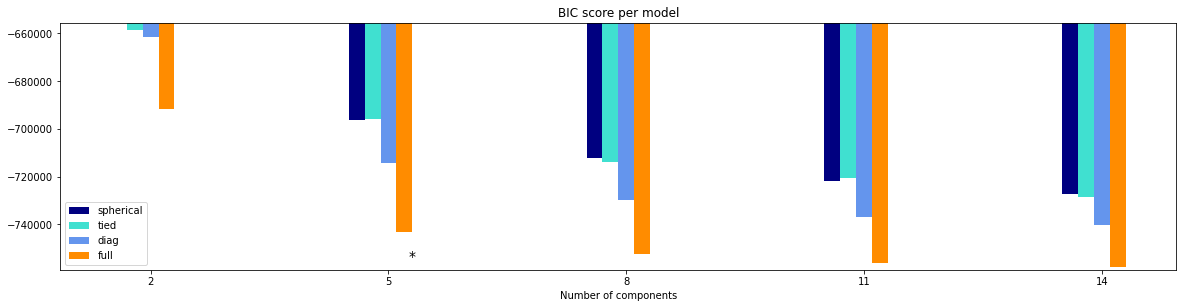

In [31]:
em_run(X_ICA,Y)

Model Evaluation: EM
| Components =  5
| Covariance =  full
| Adjusted rand score = 0.00  | A perfect labeling would be scored 1
| Normalized Mutual Information Score = 0.00
| Adjusted Mutual Information Score = 0.00
| Fowlkes Mallows Score = 0.34
| Silhouette Coefficient = 0.37
| Log-likelihood value = 12.93
| Homogeneity Score = 0.01
| completeness score = 0.00
 --- 


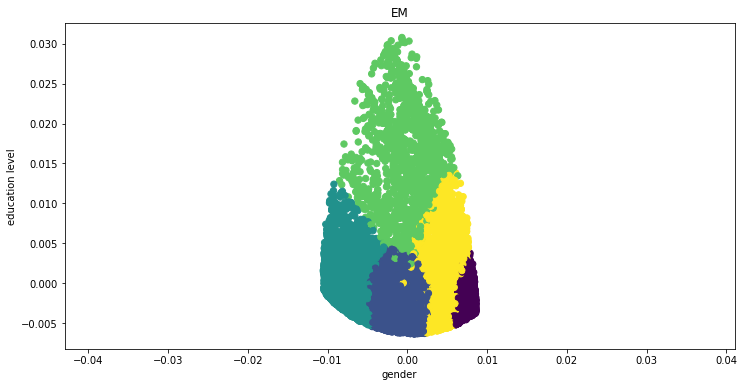

In [32]:
em_eval(X_ICA,Y,n_components = 5, covariance_type = 'full')

## RandomProjection

In [33]:
X_grp = GaussianRandomProjection(n_components = 3, eps = 0.5, random_state = 50).fit_transform(X)
X_grp_df = pd.DataFrame(X_grp)
X_grp_df.head()

,0,1,2
0,0.666033,0.888928,0.123848
1,-0.238477,0.121396,-0.506398
2,-0.044327,-0.118503,-0.311556
3,0.220236,-0.126408,0.032872
4,-0.321163,0.564269,-0.609287


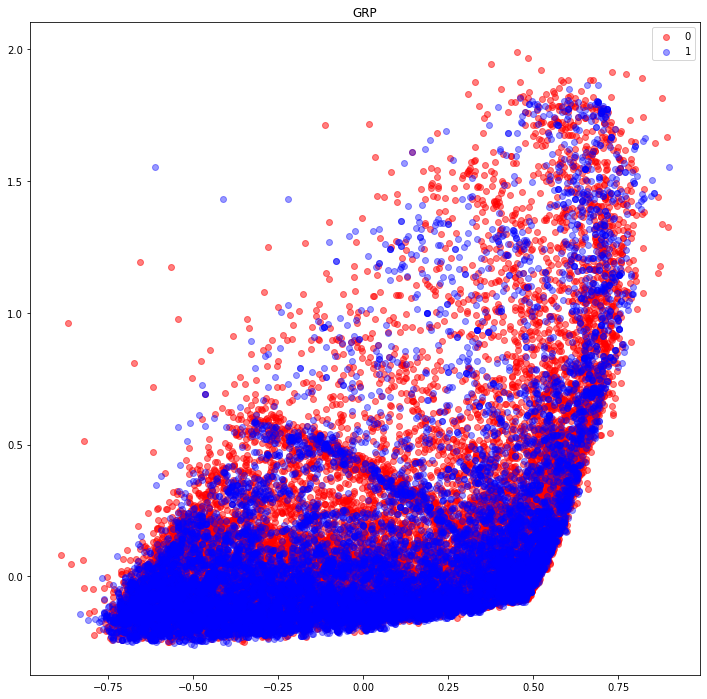

In [34]:
y = Y
plt.figure(figsize=(12,12))

plt.scatter(X_grp[Y==0, 0], X_grp[Y==0, 1], color='red', alpha=0.5,label='0')
plt.scatter(X_grp[Y==1, 0], X_grp[Y==1, 1], color='blue', alpha=0.4,label='1')
plt.title("GRP")
plt.legend()
plt.show()

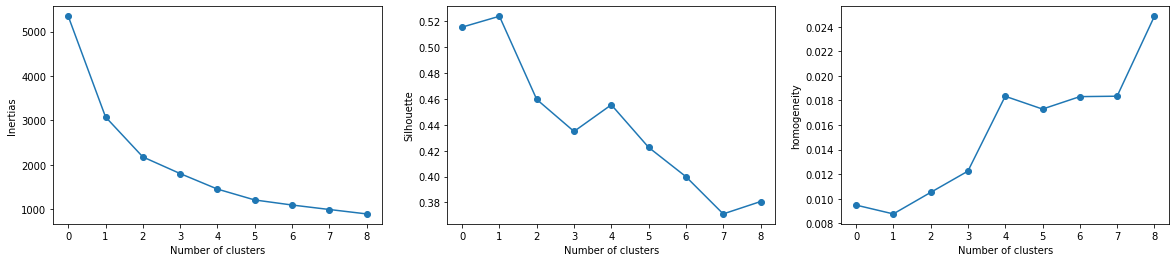

In [35]:
kmeans_run(X_grp,Y)

Model Evaluation: K-Means
| Clusters =  2
| Iterations to converge =  9
| Adjusted rand score = 0.01  | A perfect labeling would be scored 1
| Normalized Mutual Information Score = 0.01
| Adjusted Mutual Information Score = 0.01
| Fowlkes Mallows Score = 0.51
| Silhouette Coefficient = 0.52
| Inertia =  5343.922955634406
| Homogeneity Score = 0.01
| completeness score = 0.01
 --- 


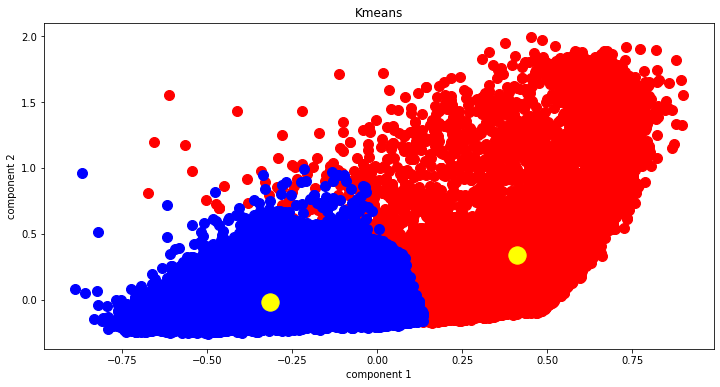

In [36]:
kmeans_eval(X_grp_df,Y,2)

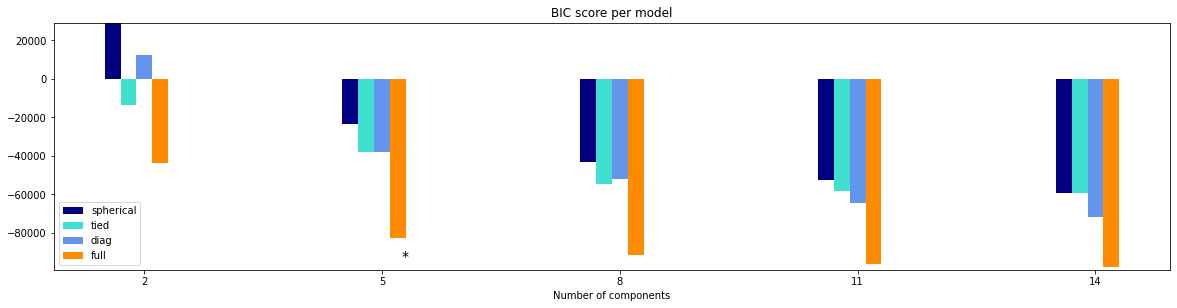

In [37]:
em_run(X_grp_df,Y)

Model Evaluation: EM
| Components =  5
| Covariance =  full
| Adjusted rand score = 0.01  | A perfect labeling would be scored 1
| Normalized Mutual Information Score = 0.01
| Adjusted Mutual Information Score = 0.01
| Fowlkes Mallows Score = 0.33
| Silhouette Coefficient = 0.28
| Log-likelihood value = 1.45
| Homogeneity Score = 0.02
| completeness score = 0.01
 --- 


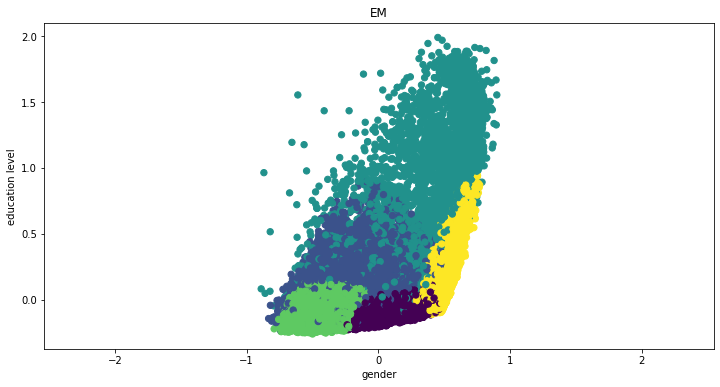

In [38]:
em_eval(X_grp_df,Y,5,'full')

## Random Forest Classifier

In [97]:
#https://towardsdatascience.com/feature-selection-using-random-forest-26d7b747597f
sel = SelectFromModel(RandomForestClassifier(n_estimators = 500, random_state = 50, n_jobs = -1))
sel.fit(X,Y)

SelectFromModel(estimator=RandomForestClassifier(n_estimators=500, n_jobs=-1,
                                                 random_state=50))

In [98]:
sel.get_support()

array([ True, False,  True, False,  True,  True, False, False,  True,
        True,  True,  True])

In [180]:
selected_feat= X.columns[(sel.get_support())]
len(selected_feat)
print(selected_feat)

Index(['gender', 'education_level', 'experience', 'company_size', 'city',
       'city_development_index', 'relevent_experience', 'training_hours'],
      dtype='object')


In [181]:
X_RandForest = X[selected_feat]

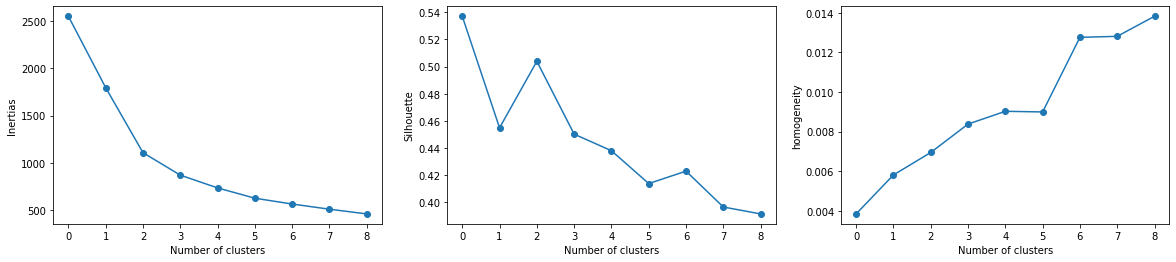

In [107]:
kmeans_run(X_RandForest,Y)

Model Evaluation: K-Means
| Clusters =  2
| Iterations to converge =  8
| Adjusted rand score = 0.01  | A perfect labeling would be scored 1
| Normalized Mutual Information Score = 0.00
| Adjusted Mutual Information Score = 0.00
| Fowlkes Mallows Score = 0.50
| Silhouette Coefficient = 0.54
| Inertia =  2550.292983535529
| Homogeneity Score = 0.00
| completeness score = 0.00
 --- 


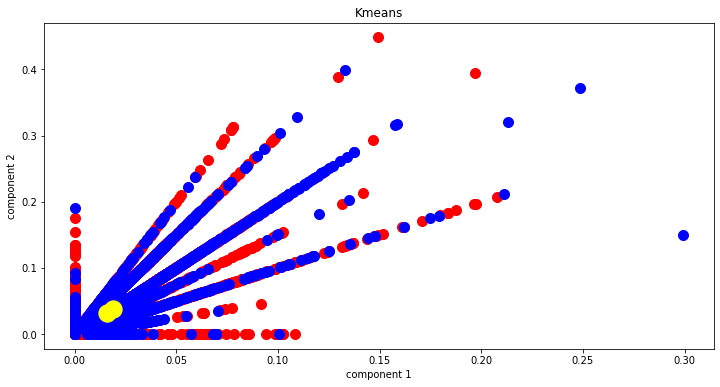

In [108]:
kmeans_eval(X_RandForest,Y,2)

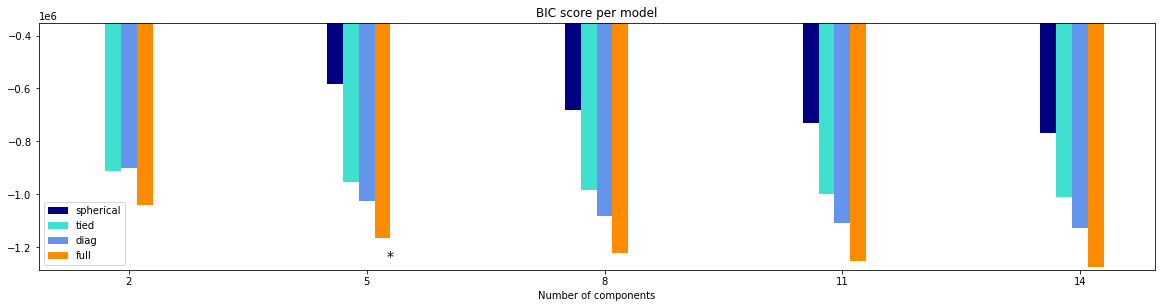

In [109]:
em_run(X_RandForest,Y)

Model Evaluation: EM
| Components =  5
| Covariance =  full
| Adjusted rand score = 0.01  | A perfect labeling would be scored 1
| Normalized Mutual Information Score = 0.01
| Adjusted Mutual Information Score = 0.01
| Fowlkes Mallows Score = 0.32
| Silhouette Coefficient = 0.35
| Log-likelihood value = 20.33
| Homogeneity Score = 0.01
| completeness score = 0.00
 --- 


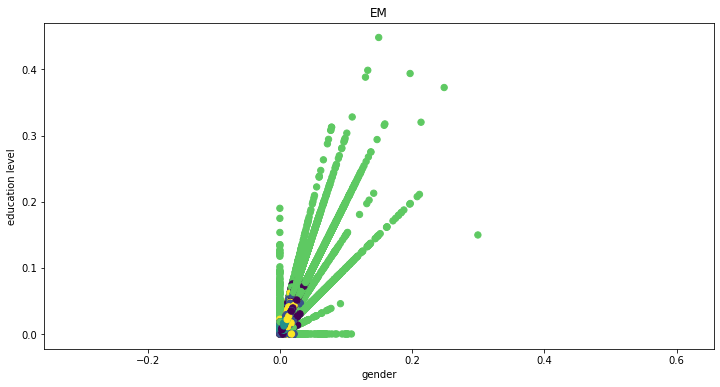

In [111]:
em_eval(X_RandForest,Y,5,'full')

## NN-4

In [112]:
X_ICA_train, X_ICA_test, Y_ICA_train, Y_ICA_test = train_test_split(X_ICA,Y, random_state = 42, shuffle = True, test_size = 0.2)
X_ICA_train.head()

X_PCA_train, X_PCA_test, Y_PCA_train, Y_PCA_test = train_test_split(X_PCA,Y, random_state = 42, shuffle = True, test_size = 0.2)
X_PCA_train.head()

X_grp_train, X_grp_test, Y_grp_train, Y_grp_test = train_test_split(X_grp_df,Y, random_state = 42, shuffle = True, test_size = 0.2)
X_grp_train.head()

X_randforest_train, X_randforest_test, Y_randforest_train, Y_randforest_test = train_test_split(X_RandForest,Y, random_state = 42, shuffle = True, test_size = 0.2)
X_randforest_train.head()

,gender,education_level,experience,company_size,city,city_development_index,relevent_experience,training_hours
3274,0.015377,0.046130,0.123013,0.061507,0.984104,0.009595,0.015377,0.076883
6325,0.007451,0.014901,0.119211,0.037253,0.044704,0.006884,0.007451,0.990942
2425,0.016180,0.024270,0.088989,0.024270,0.768539,0.006917,0.000000,0.631011
15404,0.008479,0.016958,0.084790,0.025437,0.703754,0.006461,0.008479,0.703754
26265,0.006790,0.013580,0.122223,0.027161,0.033951,0.006247,0.006790,0.991367


In [43]:
%%time
clf_ica = MLPClassifier(hidden_layer_sizes=(10,7,5),
                   #alpha = 0.0005,
                   activation = 'relu',
                   learning_rate = 'adaptive',
                    learning_rate_init = 0.001,
                    random_state = 42
                    ).fit(X_ICA_train, Y_ICA_train)

CPU times: user 1.51 s, sys: 2.29 ms, total: 1.51 s
Wall time: 1.51 s


In [44]:
%%time
clf_pca = MLPClassifier(hidden_layer_sizes=(10,7,5),
                   #alpha = 0.0005,
                   activation = 'relu',
                   learning_rate = 'adaptive',
                    learning_rate_init = 0.001,
                    random_state = 42
                    ).fit(X_PCA_train, Y_PCA_train)

CPU times: user 2.88 s, sys: 0 ns, total: 2.88 s
Wall time: 2.87 s


In [45]:
%%time
clf_grp = MLPClassifier(hidden_layer_sizes=(10,7,5),
                   #alpha = 0.0005,
                   activation = 'relu',
                   learning_rate = 'adaptive',
                    learning_rate_init = 0.001,
                    random_state = 42
                    ).fit(X_grp_train, Y_grp_train)

CPU times: user 2.85 s, sys: 9.65 ms, total: 2.86 s
Wall time: 2.85 s


In [115]:
%%time
clf_randforest = MLPClassifier(hidden_layer_sizes=(10,7,5),
                   #alpha = 0.0005,
                   activation = 'relu',
                   learning_rate = 'adaptive',
                    learning_rate_init = 0.001,
                    max_iter = 1000,
                    random_state = 42
                    ).fit(X_randforest_train, Y_randforest_train)

CPU times: user 48.3 s, sys: 10.3 ms, total: 48.4 s
Wall time: 48.3 s


In [46]:
%%time
ClassPrediction_ica = clf_ica.predict(X_ICA_test)
Probability_ica = clf_ica.predict_proba(X_ICA_test)[:,1]

CPU times: user 8.38 ms, sys: 9.21 ms, total: 17.6 ms
Wall time: 9.65 ms


In [47]:
%%time
ClassPrediction_pca = clf_pca.predict(X_PCA_test)
Probability_pca = clf_pca.predict_proba(X_PCA_test)[:,1]

CPU times: user 18.8 ms, sys: 896 µs, total: 19.7 ms
Wall time: 8.56 ms


In [48]:
%%time
ClassPrediction_grp = clf_grp.predict(X_grp_test)
Probability_grp = clf_grp.predict_proba(X_grp_test)[:,1]

CPU times: user 23.3 ms, sys: 11.9 ms, total: 35.2 ms
Wall time: 11.6 ms


In [117]:
%%time
ClassPrediction_randforest = clf_randforest.predict(X_randforest_test)
Probability_randforest = clf_randforest.predict_proba(X_randforest_test)[:,1]

CPU times: user 61.5 ms, sys: 8.43 ms, total: 69.9 ms
Wall time: 20.2 ms


In [50]:
y_train_pred = clf_ica.predict_proba(X_ICA_train)
y_train_pred_pos = y_train_pred[:,1]

y_val_pred = clf_ica.predict_proba(X_ICA_test)
y_val_pred_pos = y_val_pred[:,1]

auc_train = roc_auc_score(Y_ICA_train, y_train_pred_pos)
auc_test = roc_auc_score(Y_ICA_test, y_val_pred_pos)

print(f"Train AUC Score {auc_train}")
print(f"Test AUC Score {auc_test}")

print(' ')

fpr, tpr, _ = roc_curve(Y_ICA_test, y_val_pred_pos)

ClassPrediction_ica = clf_ica.predict(X_ICA_test)
Probability_ica = clf_ica.predict_proba(X_ICA_test)[:,1]

print('Acuracy ', accuracy_score(Y_ICA_test,ClassPrediction_ica))
print('ROC_AUC ', roc_auc_score(Y_ICA_test,Probability_ica))
print('PR ', average_precision_score(Y_ICA_test, Probability_ica))

print(' ')

# Plot the confussion matrix
print(confusion_matrix(Y_ICA_test, ClassPrediction_ica))
print(classification_report(Y_ICA_test, ClassPrediction_ica))

Train AUC Score 0.5
Test AUC Score 0.5
 
Acuracy  0.5000869111767773
ROC_AUC  0.5
PR  0.49991308882322266
 
[[2877    0]
 [2876    0]]
              precision    recall  f1-score   support

           0       0.50      1.00      0.67      2877
           1       0.00      0.00      0.00      2876

    accuracy                           0.50      5753
   macro avg       0.25      0.50      0.33      5753
weighted avg       0.25      0.50      0.33      5753



/anaconda/envs/azureml_py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/anaconda/envs/azureml_py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/anaconda/envs/azureml_py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [53]:
y_train_pred = clf_pca.predict_proba(X_PCA_train)
y_train_pred_pos = y_train_pred[:,1]

y_val_pred = clf_pca.predict_proba(X_PCA_test)
y_val_pred_pos = y_val_pred[:,1]

auc_train = roc_auc_score(Y_PCA_train, y_train_pred_pos)
auc_test = roc_auc_score(Y_PCA_test, y_val_pred_pos)

print(f"Train AUC Score {auc_train}")
print(f"Test AUC Score {auc_test}")

print(' ')

fpr, tpr, _ = roc_curve(Y_PCA_test, y_val_pred_pos)

ClassPrediction_pca = clf_pca.predict(X_PCA_test)
Probability_pca = clf_pca.predict_proba(X_PCA_test)[:,1]

print('Acuracy ', accuracy_score(Y_PCA_test,ClassPrediction_pca))
print('ROC_AUC ', roc_auc_score(Y_PCA_test,Probability_pca))
print('PR ', average_precision_score(Y_PCA_test, Probability_pca))

print(' ')

# Plot the confussion matrix
print(confusion_matrix(Y_PCA_test, ClassPrediction_pca))
print(classification_report(Y_PCA_test, ClassPrediction_pca))

Train AUC Score 0.6240424924097221
Test AUC Score 0.6295984217062762
 
Acuracy  0.6000347644707109
ROC_AUC  0.6295984217062762
PR  0.606867292944136
 
[[1905  972]
 [1329 1547]]
              precision    recall  f1-score   support

           0       0.59      0.66      0.62      2877
           1       0.61      0.54      0.57      2876

    accuracy                           0.60      5753
   macro avg       0.60      0.60      0.60      5753
weighted avg       0.60      0.60      0.60      5753



In [55]:
y_train_pred = clf_grp.predict_proba(X_grp_train)
y_train_pred_pos = y_train_pred[:,1]

y_val_pred = clf_grp.predict_proba(X_grp_test)
y_val_pred_pos = y_val_pred[:,1]

auc_train = roc_auc_score(Y_grp_train, y_train_pred_pos)
auc_test = roc_auc_score(Y_grp_test, y_val_pred_pos)

print(f"Train AUC Score {auc_train}")
print(f"Test AUC Score {auc_test}")

print(' ')

fpr, tpr, _ = roc_curve(Y_grp_test, y_val_pred_pos)

ClassPrediction_grp = clf_grp.predict(X_grp_test)
Probability_grp = clf_grp.predict_proba(X_grp_test)[:,1]

print('Acuracy ', accuracy_score(Y_grp_test,ClassPrediction_grp))
print('ROC_AUC ', roc_auc_score(Y_grp_test,Probability_grp))
print('PR ', average_precision_score(Y_grp_test, Probability_grp))

print(' ')

# Plot the confussion matrix
print(confusion_matrix(Y_grp_test, ClassPrediction_grp))
print(classification_report(Y_grp_test, ClassPrediction_grp))

Train AUC Score 0.6301244349224713
Test AUC Score 0.6327723641967877
 
Acuracy  0.6040326786024682
ROC_AUC  0.6327723641967877
PR  0.6177680596434805
 
[[1934  943]
 [1335 1541]]
              precision    recall  f1-score   support

           0       0.59      0.67      0.63      2877
           1       0.62      0.54      0.58      2876

    accuracy                           0.60      5753
   macro avg       0.61      0.60      0.60      5753
weighted avg       0.61      0.60      0.60      5753



In [182]:
y_train_pred = clf_randforest.predict_proba(X_randforest_train)
y_train_pred_pos = y_train_pred[:,1]

y_val_pred = clf_randforest.predict_proba(X_randforest_test)
y_val_pred_pos = y_val_pred[:,1]

auc_train = roc_auc_score(Y_randforest_train, y_train_pred_pos)
auc_test = roc_auc_score(Y_randforest_test, y_val_pred_pos)

print(f"Train AUC Score {auc_train}")
print(f"Test AUC Score {auc_test}")

print(' ')

fpr, tpr, _ = roc_curve(Y_randforest_test, y_val_pred_pos)

ClassPrediction_randforest = clf_randforest.predict(X_randforest_test)
Probability_randforest = clf_randforest.predict_proba(X_randforest_test)[:,1]

print('Acuracy ', accuracy_score(Y_randforest_test,ClassPrediction_randforest))
print('ROC_AUC ', roc_auc_score(Y_randforest_test,Probability_randforest))
print('PR ', average_precision_score(Y_randforest_test, Probability_randforest))

print(' ')

# Plot the confussion matrix
print(confusion_matrix(Y_randforest_test, ClassPrediction_randforest))
print(classification_report(Y_randforest_test, ClassPrediction_randforest))

Train AUC Score 0.7568571957889749
Test AUC Score 0.7483190625569538
 
Acuracy  0.7045019989570659
ROC_AUC  0.7483190625569538
PR  0.6980416449229494
 
[[1865 1012]
 [ 688 2188]]
              precision    recall  f1-score   support

           0       0.73      0.65      0.69      2877
           1       0.68      0.76      0.72      2876

    accuracy                           0.70      5753
   macro avg       0.71      0.70      0.70      5753
weighted avg       0.71      0.70      0.70      5753



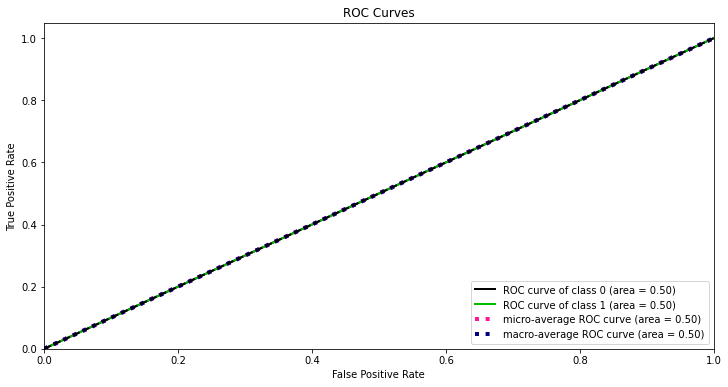

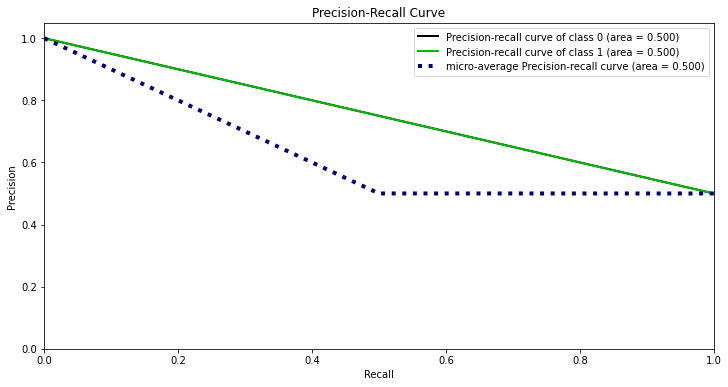

<module 'matplotlib.pyplot' from '/anaconda/envs/azureml_py36/lib/python3.6/site-packages/matplotlib/pyplot.py'>

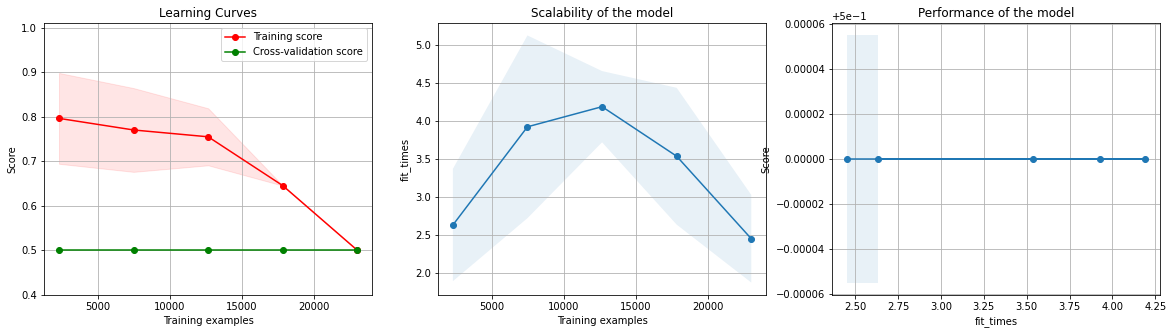

In [183]:
predicted_probas = clf_ica.predict_proba(X_ICA_test)

skplt.metrics.plot_roc(Y_ICA_test, predicted_probas)
plt.show()

skplt.metrics.plot_precision_recall(y_true=Y_ICA_test, y_probas=predicted_probas)
plt.show()

estimator = clf_ica
plot_learning_curve(estimator, "Learning Curves", X_ICA, Y, ylim=(0.4, 1.01),
                    cv=5, n_jobs=4)

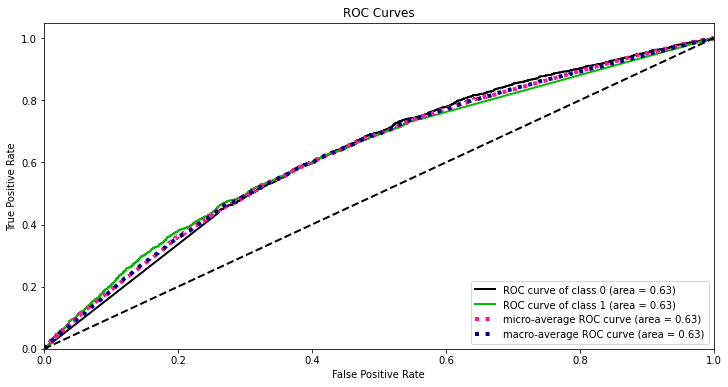

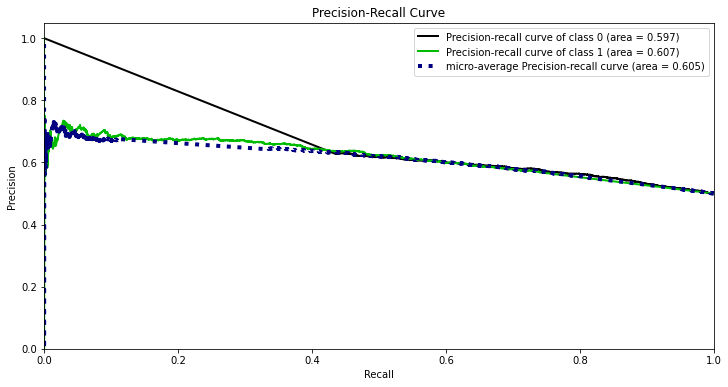

<module 'matplotlib.pyplot' from '/anaconda/envs/azureml_py36/lib/python3.6/site-packages/matplotlib/pyplot.py'>

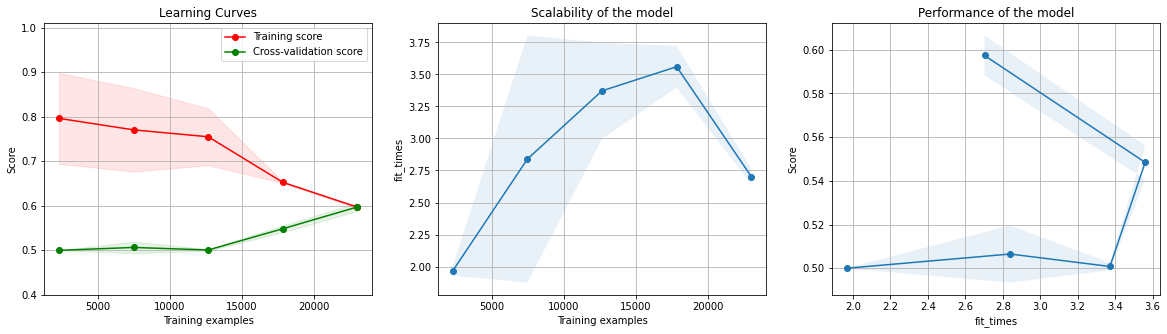

In [150]:
predicted_probas = clf_pca.predict_proba(X_PCA_test)

skplt.metrics.plot_roc(Y_PCA_test, predicted_probas)
plt.show()

skplt.metrics.plot_precision_recall(y_true=Y_PCA_test, y_probas=predicted_probas)
plt.show()

estimator = clf_pca
plot_learning_curve(estimator, "Learning Curves", X_PCA, Y, ylim=(0.4, 1.01),
                    cv=5, n_jobs=4)

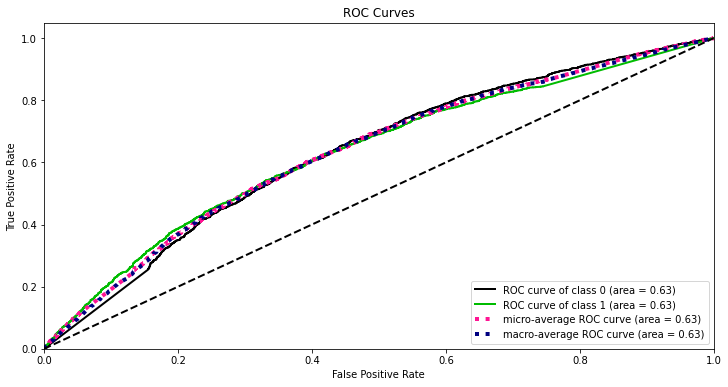

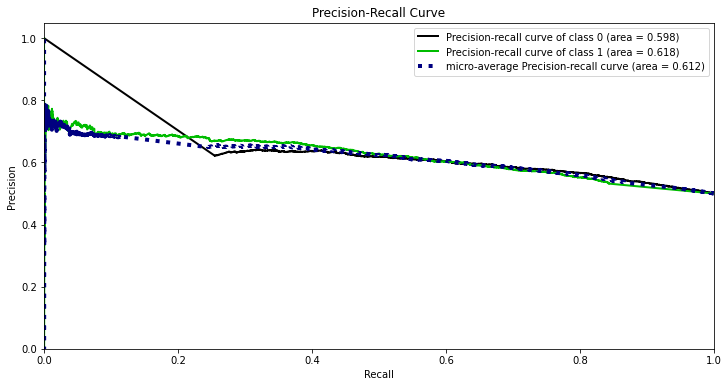

<module 'matplotlib.pyplot' from '/anaconda/envs/azureml_py36/lib/python3.6/site-packages/matplotlib/pyplot.py'>

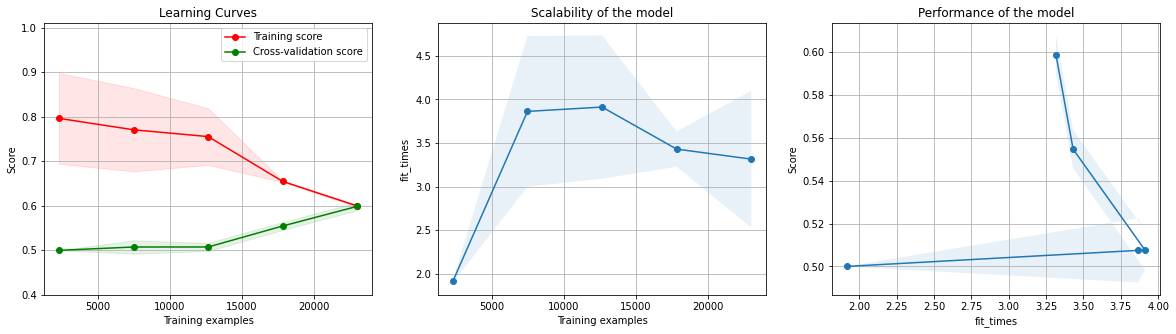

In [58]:
predicted_probas = clf_grp.predict_proba(X_grp_test)

skplt.metrics.plot_roc(Y_grp_test, predicted_probas)
plt.show()

skplt.metrics.plot_precision_recall(y_true=Y_grp_test, y_probas=predicted_probas)
plt.show()

estimator = clf_grp
plot_learning_curve(estimator, "Learning Curves", X_grp, Y, ylim=(0.4, 1.01),
                    cv=5, n_jobs=4)

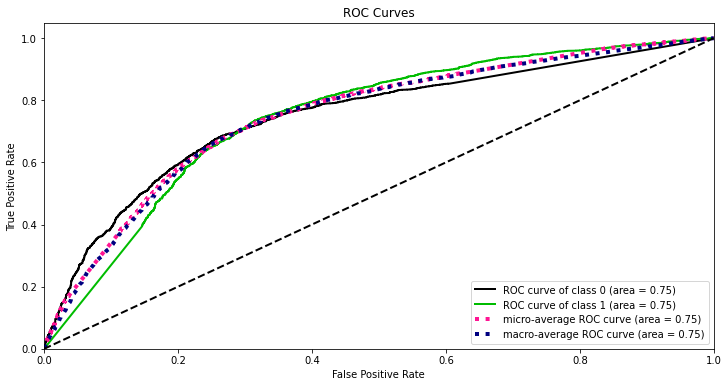

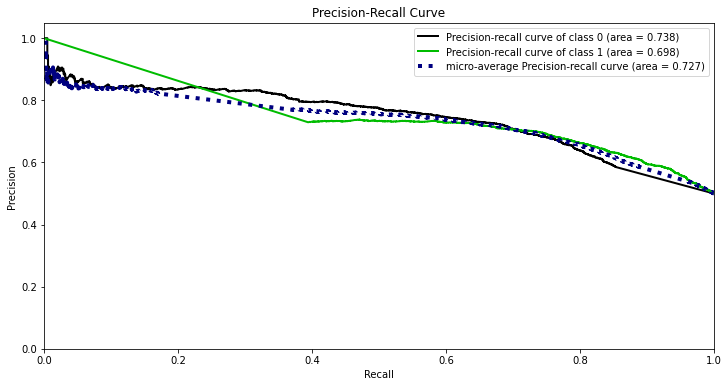

<module 'matplotlib.pyplot' from '/anaconda/envs/azureml_py36/lib/python3.6/site-packages/matplotlib/pyplot.py'>

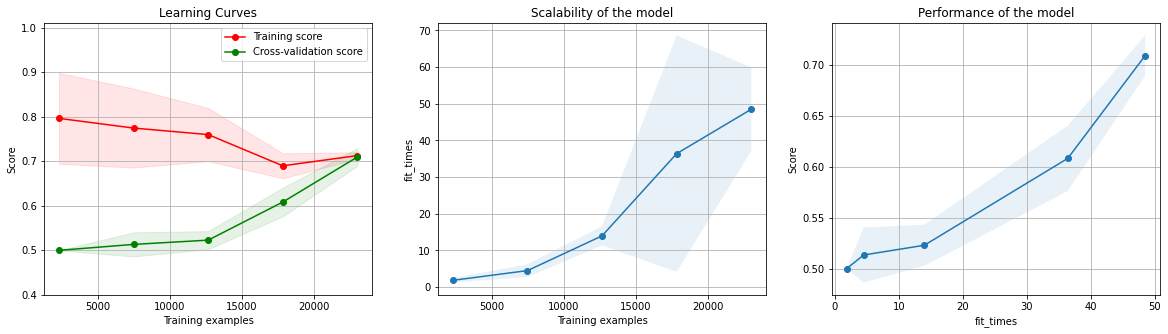

In [121]:
predicted_probas = clf_randforest.predict_proba(X_randforest_test)

skplt.metrics.plot_roc(Y_randforest_test, predicted_probas)
plt.show()

skplt.metrics.plot_precision_recall(y_true=Y_randforest_test, y_probas=predicted_probas)
plt.show()

estimator = clf_randforest
plot_learning_curve(estimator, "Learning Curves", X_RandForest, Y, ylim=(0.4, 1.01),
                    cv=5, n_jobs=4)

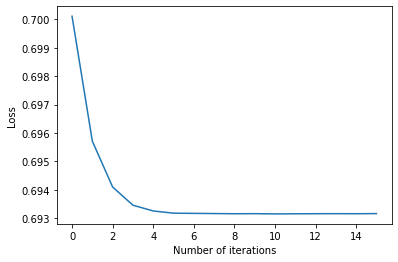

In [60]:
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(clf_ica.loss_curve_)
ax.set_xlabel('Number of iterations')
ax.set_ylabel('Loss')
plt.show()

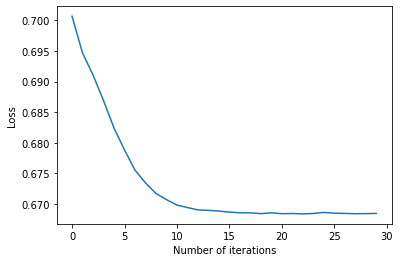

In [61]:
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(clf_pca.loss_curve_)
ax.set_xlabel('Number of iterations')
ax.set_ylabel('Loss')
plt.show()

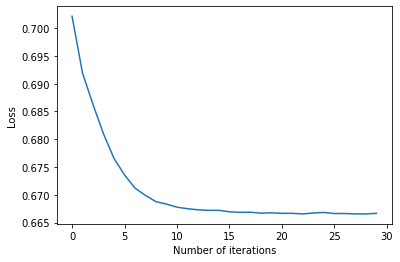

In [62]:
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(clf_grp.loss_curve_)
ax.set_xlabel('Number of iterations')
ax.set_ylabel('Loss')
plt.show()

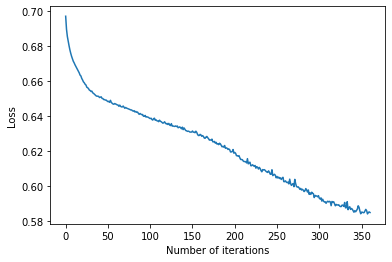

In [122]:
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(clf_randforest.loss_curve_)
ax.set_xlabel('Number of iterations')
ax.set_ylabel('Loss')
plt.show()

## NN2

In [156]:
gmm = GaussianMixture(n_components = 5, 
                      covariance_type = 'full',
                      n_init = 10,
                      max_iter = 1000,
                      random_state=50).fit(X)

gmm_labels = gmm.predict(X)

In [157]:
kmeans = KMeans(n_clusters=2, 
                init = 'random',
                n_init=10,
                max_iter=1000,                
                random_state=50).fit(X)
kmeans_labels = kmeans.predict(X)

In [158]:
gmm_labels = pd.DataFrame(gmm_labels)
kmeans_labels = pd.DataFrame(kmeans_labels)


In [170]:
X_Clusters = pd.concat([kmeans_labels, gmm_labels], axis = 1)
X_Clusters.columns = ['kmeans', 'gmm']

In [171]:
X_Clusters 

,kmeans,gmm
0,0,4
1,1,3
2,0,1
3,0,4
4,1,3
...,...,...
28757,0,4
28758,0,2
28759,0,4
28760,1,4


In [172]:
X_clusters_train, X_clusters_test, Y_clusters_train, Y_clusters_test = train_test_split(X_Clusters,Y, random_state = 50, shuffle = True, test_size = 0.2)
X_clusters_train.head()

,kmeans,gmm
19549,0,2
7919,0,4
12716,0,2
22424,0,2
631,1,3


In [162]:
%%time
parameter_space = {
    #'hidden_layer_sizes': [ (1,2),(7,1), (10,7,5), (5,10,5), (15,10,2)]
    'hidden_layer_sizes' : [(10,7,5)]
    ,'activation': ['relu']
    ,'alpha': [0.0001, 0.0005, 0.001]
    ,'learning_rate' : ['constant', 'adaptive']
    ,'random_state' : [50]
}

GridSearch = GridSearchCV(MLPClassifier(max_iter=2000), param_grid = parameter_space, n_jobs=-1, cv=3)

CPU times: user 46 µs, sys: 15 µs, total: 61 µs
Wall time: 66.5 µs


In [163]:
%%time
GridSearch.fit(X_clusters_train, Y_clusters_train)

CPU times: user 2.72 s, sys: 6 ms, total: 2.73 s
Wall time: 17.9 s


GridSearchCV(cv=3, estimator=MLPClassifier(max_iter=2000), n_jobs=-1,
             param_grid={'activation': ['relu'],
                         'alpha': [0.0001, 0.0005, 0.001],
                         'hidden_layer_sizes': [(10, 7, 5)],
                         'learning_rate': ['constant', 'adaptive'],
                         'random_state': [50]})

In [164]:
GridSearch.best_params_

{'activation': 'relu',
 'alpha': 0.0001,
 'hidden_layer_sizes': (10, 7, 5),
 'learning_rate': 'constant',
 'random_state': 50}

In [165]:
%%time
clf_clusters = MLPClassifier(hidden_layer_sizes=(10,7,5),
                   alpha = 0.0001,
                   activation = 'relu',
                   learning_rate = 'constant',
                    learning_rate_init = 0.01,
                    random_state = 42,
                    max_iter=2000).fit(X_clusters_train, Y_clusters_train)

CPU times: user 1.63 s, sys: 12.6 ms, total: 1.64 s
Wall time: 1.64 s


In [184]:
%%time
ClassPrediction = clf_clusters.predict(X_clusters_test)
Probability = clf_clusters.predict_proba(X_clusters_test)[:,1]

CPU times: user 25.1 ms, sys: 4.25 ms, total: 29.3 ms
Wall time: 11.2 ms


In [185]:
y_train_pred = clf_clusters.predict_proba(X_clusters_train)
y_train_pred_pos = y_train_pred[:,1]

y_val_pred = clf.predict_proba(X_clusters_test)
y_val_pred_pos = y_val_pred[:,1]

auc_train = roc_auc_score(Y_clusters_train, y_train_pred_pos)
auc_test = roc_auc_score(Y_clusters_test, y_val_pred_pos)

print(f"Train AUC Score {auc_train}")
print(f"Test AUC Score {auc_test}")

print(' ')

fpr, tpr, _ = roc_curve(Y_clusters_test, y_val_pred_pos)

ClassPrediction = clf_clusters.predict(X_clusters_test)
Probability = clf_clusters.predict_proba(X_clusters_test)[:,1]

print('Acuracy ', accuracy_score(Y_clusters_test,ClassPrediction))
print('ROC_AUC ', roc_auc_score(Y_clusters_test,Probability))
print('PR ', average_precision_score(Y_clusters_test, Probability))

print(' ')

# Plot the confussion matrix
print(confusion_matrix(Y_clusters_test, ClassPrediction))
print(classification_report(Y_clusters_test, ClassPrediction))

Train AUC Score 0.5763834243517816
Test AUC Score 0.5874545571009364
 
Acuracy  0.5746567008517295
ROC_AUC  0.5874545571009364
PR  0.5675266815460821
 
[[1753 1112]
 [1335 1553]]
              precision    recall  f1-score   support

           0       0.57      0.61      0.59      2865
           1       0.58      0.54      0.56      2888

    accuracy                           0.57      5753
   macro avg       0.58      0.57      0.57      5753
weighted avg       0.58      0.57      0.57      5753



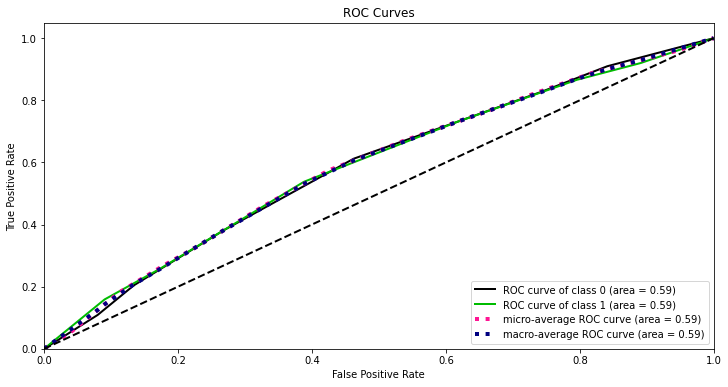

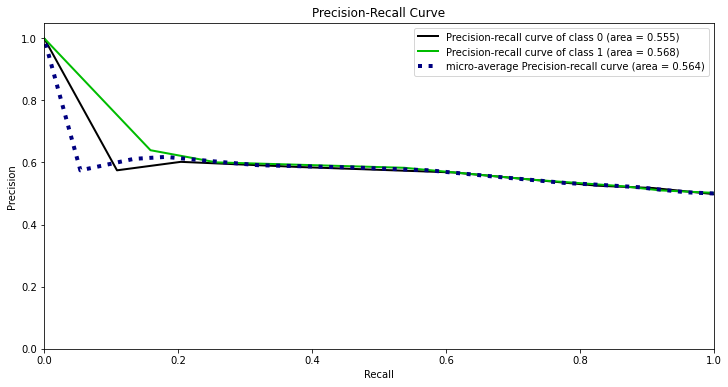

<module 'matplotlib.pyplot' from '/anaconda/envs/azureml_py36/lib/python3.6/site-packages/matplotlib/pyplot.py'>

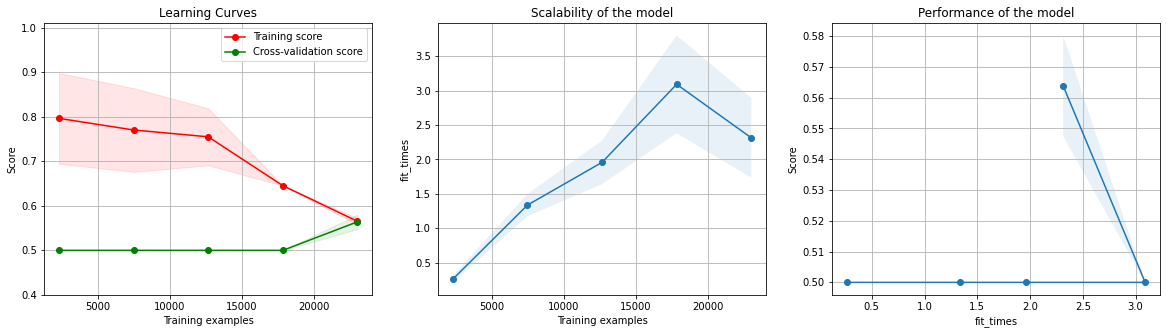

In [186]:
predicted_probas = clf_clusters.predict_proba(X_clusters_test)

skplt.metrics.plot_roc(Y_clusters_test, predicted_probas)
plt.show()

skplt.metrics.plot_precision_recall(y_true=Y_clusters_test, y_probas=predicted_probas)
plt.show()

estimator = clf_clusters
plot_learning_curve(estimator, "Learning Curves", X_Clusters, Y, ylim=(0.4, 1.01),
                    cv=5, n_jobs=4)

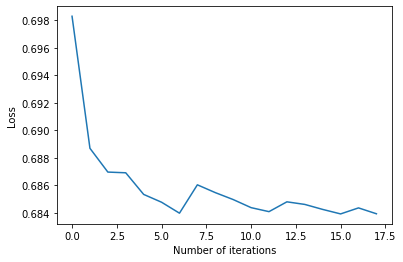

In [187]:
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(clf_clusters.loss_curve_)
ax.set_xlabel('Number of iterations')
ax.set_ylabel('Loss')
plt.show()